# Book 1.2 - Treinando Modelos

Este notebook trata-se de uma continução do primeiro, cujo optei por parar apenas na analise exploratória, pois aqui me empenhei em documentar quase todos modelos de ML supervisionado.

Este notebook serviu como registro prático e teórico no meu aprendizado de Machine Learning.

`Enriqueci este notebook com anotações adicionais e aplicações práticas tornando-o uma referência valiosa para consultas e implementações em futuros projetos reais.`

Espero que este material inspire outros a explorar ainda mais o fascinante mundo do Machine Learning. 

O book presente concentra-se em apenas documentar um overview de cada modelo.

Compartilhar conhecimento é uma alegria—viva ao aprendizado contínuo, boa pratica e bons estudo a quem estiver lendo, abraços!

# Carregamento dos Dados

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

#ignorando Warning inuteis
import warnings 
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

pd.set_option('display.max_info_columns', 500)
pd.set_option('display.max_info_rows', 500)

In [2]:
import requests

# CARREGANDO BASE
arquivo = 'fake_database'
url = "https://raw.githubusercontent.com/GabrielGabes/functions_gsa/main/" + arquivo + ".py"
response = requests.get(url)
code = response.text
exec(code)
df = fake_database2()
display(df.head())

arquivo = 'funcoes_estatisticas'
url = "https://raw.githubusercontent.com/GabrielGabes/functions_gsa/main/" + arquivo + ".py"
response = requests.get(url)
code = response.text
exec(code)
print('TUDO OK')

,x_num0,x_num1,x_num2,x_num3,x_num4,x_num5,x_num6,x_num7,x_num8,x_num9,...,x_bin0,x_bin1,x_bin2,x_bin3,x_bin4,x_cat0,x_cat1,x_cat2,x_cat_0,x_cat_1
0,4.875997,-1.491729,2.491069,1.874948,-0.000381,1.478758,3.972563,0.230329,5.149503,0.595726,...,sim,não,sim,não,sim,A,B,A,C,D
1,3.750108,-0.510656,-0.462908,0.928715,0.496968,-0.995687,2.219878,-1.951839,0.335021,-0.071709,...,não,não,não,sim,não,B,B,C,C,B
2,1.915908,2.793605,2.989653,1.743696,-0.213394,-0.274895,0.106642,1.605156,2.169961,-1.126328,...,sim,sim,sim,não,sim,C,A,C,B,C
3,3.575351,2.779022,4.928382,3.046386,-1.832086,-2.961492,1.171947,1.044997,3.281876,-1.733729,...,não,não,não,sim,não,B,A,A,D,D
4,4.812294,0.316227,0.704474,0.908321,0.050424,-2.080064,2.597434,-1.643092,-0.138313,-1.498914,...,sim,não,não,não,não,A,B,A,D,B


TUDO OK


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column   Dtype  
---  ------   -----  
 0   x_num0   float64
 1   x_num1   float64
 2   x_num2   float64
 3   x_num3   float64
 4   x_num4   float64
 5   x_num5   float64
 6   x_num6   float64
 7   x_num7   float64
 8   x_num8   float64
 9   x_num9   float64
 10  y        object 
 11  x_bin0   object 
 12  x_bin1   object 
 13  x_bin2   object 
 14  x_bin3   object 
 15  x_bin4   object 
 16  x_cat0   object 
 17  x_cat1   object 
 18  x_cat2   object 
 19  x_cat_0  object 
 20  x_cat_1  object 
dtypes: float64(10), object(11)
memory usage: 164.2+ KB


In [4]:
# Variavel Dependente
var_dep = 'y'
y = df[var_dep]
display(y.head())

x = df.drop('y', axis=1)
display(x.head())

0    0
1    1
2    0
3    1
4    1
Name: y, dtype: object

,x_num0,x_num1,x_num2,x_num3,x_num4,x_num5,x_num6,x_num7,x_num8,x_num9,x_bin0,x_bin1,x_bin2,x_bin3,x_bin4,x_cat0,x_cat1,x_cat2,x_cat_0,x_cat_1
0,4.875997,-1.491729,2.491069,1.874948,-0.000381,1.478758,3.972563,0.230329,5.149503,0.595726,sim,não,sim,não,sim,A,B,A,C,D
1,3.750108,-0.510656,-0.462908,0.928715,0.496968,-0.995687,2.219878,-1.951839,0.335021,-0.071709,não,não,não,sim,não,B,B,C,C,B
2,1.915908,2.793605,2.989653,1.743696,-0.213394,-0.274895,0.106642,1.605156,2.169961,-1.126328,sim,sim,sim,não,sim,C,A,C,B,C
3,3.575351,2.779022,4.928382,3.046386,-1.832086,-2.961492,1.171947,1.044997,3.281876,-1.733729,não,não,não,sim,não,B,A,A,D,D
4,4.812294,0.316227,0.704474,0.908321,0.050424,-2.080064,2.597434,-1.643092,-0.138313,-1.498914,sim,não,não,não,não,A,B,A,D,B


In [5]:
# DUMMYRIZAÇÃO
colunas_categoricas = []
colunas_binarias = []
colunas_mais3_categorias = []

for coluna in x.columns:
    if df[coluna].dtype == 'O':
        categorias = x[coluna].unique()
        if len(categorias) == 2:
            print('2 niveis:', coluna, '=>', categorias)
            colunas_categoricas.append(coluna)
            colunas_binarias.append(coluna)
        else:
            print('3 niveis:', coluna, '=>', categorias)
            colunas_categoricas.append(coluna)
            colunas_mais3_categorias.append(coluna)

############################################################################################
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder #transformando colunas com 2 categorias em 0 e 1

coluna = x.columns
one_hot = make_column_transformer((
    OneHotEncoder(drop='if_binary'), #caso a coluna tenha apenas 2 categorias 
    colunas_categoricas), #passando quais são essas colunas
    remainder = 'passthrough', sparse_threshold=0) #oque deve ser feito com as outras

#Aplicando transformação
x = one_hot.fit_transform(x)

#Os novos nomes das colunas #'onehotencoder=transformadas; 'remainder'=não transformadas
novos_nomes_colunas = one_hot.get_feature_names_out(coluna)

x = pd.DataFrame(x, columns = novos_nomes_colunas) #alterando de volta
x_columns = x.columns.tolist() 

############################################################################################
# NORMALIZAÇÃO
from sklearn.preprocessing import MinMaxScaler
normalizacao = MinMaxScaler()
x = normalizacao.fit_transform(x)

#df['Close_padronizada'] = (df[coluna] - df[coluna].mean()) / df[coluna].std()
#df['Close_normalizada'] = (df[coluna] - df[coluna].min()) / (df[coluna].max() - df[coluna].min())

############################################################################################
# DEFININDO A VARIAVEL DEPENDENTE
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)

############################################################################################
# DIVIDINDO BASE EM TREINO E TESTE
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, 
                                                    stratify = y, #para manter a proporção da Var Dep nos splits
                                                    random_state = 5) #raiz da aleatoridade
# test_size = 0.25 #porcentagem que ira ser separado para testes

print(x_treino.shape, x_teste.shape)
print(y_treino.shape, y_teste.shape)

2 niveis: x_bin0 => ['sim' 'não']
2 niveis: x_bin1 => ['não' 'sim']
2 niveis: x_bin2 => ['sim' 'não']
2 niveis: x_bin3 => ['não' 'sim']
2 niveis: x_bin4 => ['sim' 'não']
3 niveis: x_cat0 => ['A' 'B' 'C']
3 niveis: x_cat1 => ['B' 'A' 'C']
3 niveis: x_cat2 => ['A' 'C' 'B']
3 niveis: x_cat_0 => ['C' 'B' 'D' 'A']
3 niveis: x_cat_1 => ['D' 'B' 'C' 'A']
(750, 32) (250, 32)
(750,) (250,)


# Função de avaliação do modelo

In [6]:
# Função para avaliação de modelos exibindo metricas de avaliação
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, RocCurveDisplay


def avaliar_modelo(y_verdadeiro, y_predito, conjunto_nome):
    """
    Função para avaliar e imprimir o relatório de classificação e a matriz de confusão.
    """
    #if conjunto_nome == "Treino":
     #   pass
    #else:
    print('*' * 70)
    print("Relatório de Classificação para o Conjunto de", conjunto_nome,":\n")
    print(classification_report(y_verdadeiro, y_predito))
    
    print('*' * 55)
    
    print("Matriz de Confusão para o Conjunto de", conjunto_nome,":\n")
    print(confusion_matrix(y_verdadeiro, y_predito))
    print('*' * 70)

    display(RocCurveDisplay.from_predictions(y_verdadeiro, y_predito, name = conjunto_nome))

###############################################################################################
# ou pode-se tbm carregar através de:
'''
import requests
arquivo = 'ML_supervised_learning'
url = "https://raw.githubusercontent.com/GabrielGabes/functions_gsa/main/" + arquivo + ".py"
response = requests.get(url)
code = response.text
exec(code)
'''


'\nimport requests\narquivo = \'ML_supervised_learning\'\nurl = "https://raw.githubusercontent.com/GabrielGabes/functions_gsa/main/" + arquivo + ".py"\nresponse = requests.get(url)\ncode = response.text\nexec(code)\n'

# ========== CRIAÇÃO DE MODELOS ==========

# LazyClassifier

Antes de tudo...

LazyPedict é uma biblioteca que ajuda a semi-automatizar os modelos de Machine Learning.

Essa biblioteca constrói muitos modelos básicos sem muito código e ajuda a entender quais modelos funcionam melhor sem qualquer ajuste de parâmetro.

Após a obtenção dos resultados de acurácia e avaliação das métricas podemos escolher os melhores modelos e aplicar o ajuste de hiperparâmetros a eles.

Então, no caso dos dados deste projeto vou usar o LazyClassifier para tentar resolver o problema de classificação para ter um overview geral basico dos melhores modelos.

In [13]:
from lazypredict.Supervised import LazyClassifier, LazyRegressor

np.random.seed(73246) #para garantir a reprodutibilidade

# Inicializando o LazyClassifier # treinando todos os modelos
clf = LazyClassifier(verbose=0, 
                     ignore_warnings=True, 
                     custom_metric=None
                     )
#predictions=True

# Treinando e avaliando os modelos
models, predictions = clf.fit(x_treino, x_teste, y_treino, y_teste)

'''"clf" está retornando dois valores, Modelo e Previsão, enquanto modelo significa 
todos os modelos e com algumas métricas e previsão significa todo o valor previsto que é ŷ'''
display(models)

100%|██████████| 29/29 [00:01<00:00, 22.44it/s]

[LightGBM] [Info] Number of positive: 376, number of negative: 374
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000452 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2570
[LightGBM] [Info] Number of data points in the train set: 750, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501333 -> initscore=0.005333
[LightGBM] [Info] Start training from score 0.005333
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.94,0.94,0.94,0.94,0.12
XGBClassifier,0.94,0.94,0.94,0.94,0.07
RandomForestClassifier,0.93,0.93,0.93,0.93,0.23
NuSVC,0.92,0.92,0.92,0.92,0.03
SVC,0.91,0.91,0.91,0.91,0.03
NearestCentroid,0.90,0.90,0.90,0.90,0.04
GaussianNB,0.90,0.90,0.90,0.90,0.01
LogisticRegression,0.90,0.90,0.90,0.90,0.01
CalibratedClassifierCV,0.90,0.90,0.90,0.90,0.08


# **Dummy Classifier**

- **Propósito Básico**: É um classificador que faz previsões usando regras simples, **sem levar em conta os dados de entrada**. Ele é usado para fornecer um **baseline** para comparar com outros algoritmos mais sofisticados.
- **Não-Aprendizado**: Diferente de outros modelos de Machine Learning, o Dummy Classifier **não aprende** nada dos dados.

**Como Funciona?**
- **Estratégias Comuns**:
  - **Mais Frequente**: Sempre prevê a **classe mais frequente** nos dados de treino.
  - **Estratégia Uniforme**: Faz previsões **aleatórias igualmente distribuídas** entre as classes.
  - **Estratégia de Probabilidade Constante**: Sempre prevê uma **classe específica** determinada pelo usuário.
  - **Estratégia de Distribuição Uniforme**: Prediz classes **aleatoriamente** de acordo com a distribuição de classes dos dados de treino.

**Para que Serve?**
- **Baseline**: Fornece um **ponto de partida** para avaliar outros modelos. Modelos com desempenho pior ou igual ao Dummy Classifier podem indicar problemas.
- **Verificação de Sanidade**: Ajuda a verificar **falhas no processo de modelagem**.

In [7]:
from sklearn.dummy import DummyClassifier
classificador = DummyClassifier()

**********************************************************************
Relatório de Classificação para o Conjunto de Treino :

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       374
           1       0.50      1.00      0.67       376

    accuracy                           0.50       750
   macro avg       0.25      0.50      0.33       750
weighted avg       0.25      0.50      0.33       750

*******************************************************
Matriz de Confusão para o Conjunto de Treino :

[[  0 374]
 [  0 376]]
**********************************************************************


**********************************************************************
Relatório de Classificação para o Conjunto de Teste :

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       124
           1       0.50      1.00      0.67       126

    accuracy                           0.50       250
   macro avg       0.25      0.50      0.34       250
weighted avg       0.25      0.50      0.34       250

*******************************************************
Matriz de Confusão para o Conjunto de Teste :

[[  0 124]
 [  0 126]]
**********************************************************************


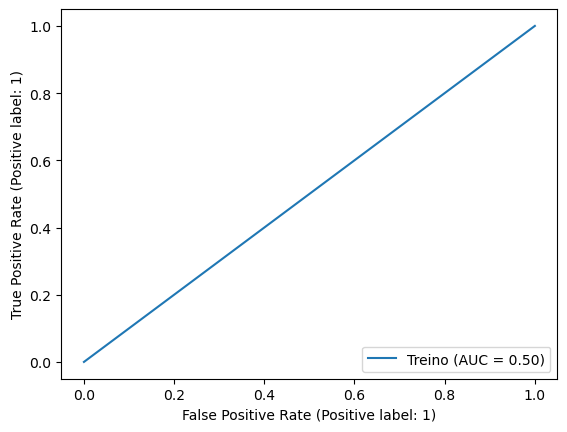

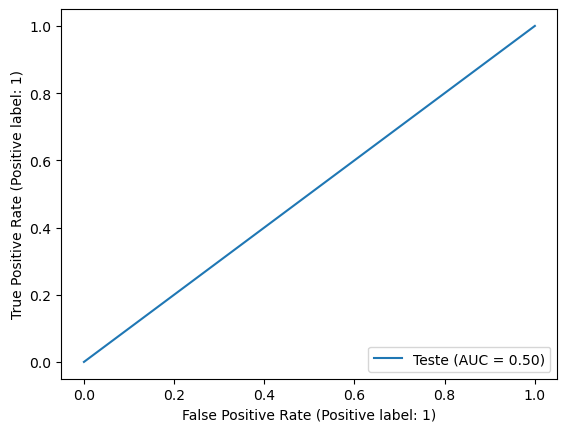

In [8]:
#######################################################################################
# Treinamento do Modelo
classificador.fit(x_treino, y_treino)

# Avaliação no conjunto de teste  # Relatório de classificação
previsoes = classificador.predict(x_teste)
avaliar_modelo(y_teste, previsoes, "Teste")
#######################################################################################

# Algoritmos Baseados em Árvores

## **Árvore de Decisão - Decision Tree**

O modelo de Árvore de Decisão é utilizado tanto para **classificação** quanto para **regressão**. Abaixo, focamos na classe `DecisionTreeClassifier` do `scikit-learn`.

**Hiperparâmetros Principais**

- **`criterion`**: Mede a qualidade de uma divisão. Suporta *"gini"* para a impureza de Gini e *"entropy"* para o ganho de informação.
- **`splitter`**: Estratégia usada para escolher a divisão em cada nó. Opções incluem *"best"* para a melhor divisão e *"random"* para uma divisão aleatória.
- **`max_depth`**: Profundidade máxima da árvore. Limita a profundidade para controlar o overfitting.
- **`min_samples_split`**: Número mínimo de amostras necessárias para dividir um nó.
- **`min_samples_leaf`**: Número mínimo de amostras necessárias para estar em um nó folha.
- **`max_features`**: Número máximo de recursos considerados para dividir um nó.
- **`random_state`**: Controla a aleatoriedade da estimação.
- **`max_leaf_nodes`**: Cresce uma árvore com `max_leaf_nodes` no melhor primeiro modo.
- **`min_impurity_decrease`**: Um nó será dividido se a divisão induzir uma diminuição da impureza maior ou igual a este valor.

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

#classificador_arvore = DecisionTreeClassifier(criterion='entropy', random_state = 0)
classificador = DecisionTreeClassifier(random_state=5,
                                       max_depth = 3) #definindo profundidade maxima

**********************************************************************
Relatório de Classificação para o Conjunto de Treino :

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       374
           1       0.87      0.80      0.83       376

    accuracy                           0.84       750
   macro avg       0.84      0.84      0.84       750
weighted avg       0.84      0.84      0.84       750

*******************************************************
Matriz de Confusão para o Conjunto de Treino :

[[329  45]
 [ 75 301]]
**********************************************************************


**********************************************************************
Relatório de Classificação para o Conjunto de Teste :

              precision    recall  f1-score   support

           0       0.72      0.84      0.77       124
           1       0.81      0.67      0.74       126

    accuracy                           0.76       250
   macro avg       0.76      0.76      0.75       250
weighted avg       0.76      0.76      0.75       250

*******************************************************
Matriz de Confusão para o Conjunto de Teste :

[[104  20]
 [ 41  85]]
**********************************************************************


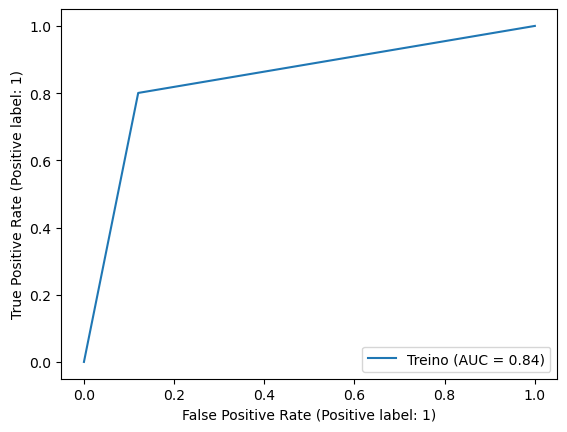

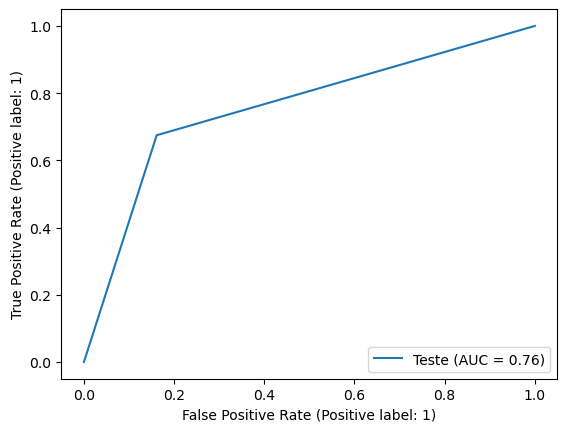

In [10]:
#######################################################################################
# Treinamento do Modelo
classificador.fit(x_treino, y_treino)

# Avaliação no conjunto de teste  # Relatório de classificação
previsoes = classificador.predict(x_teste)
avaliar_modelo(y_teste, previsoes, "Teste")
#######################################################################################

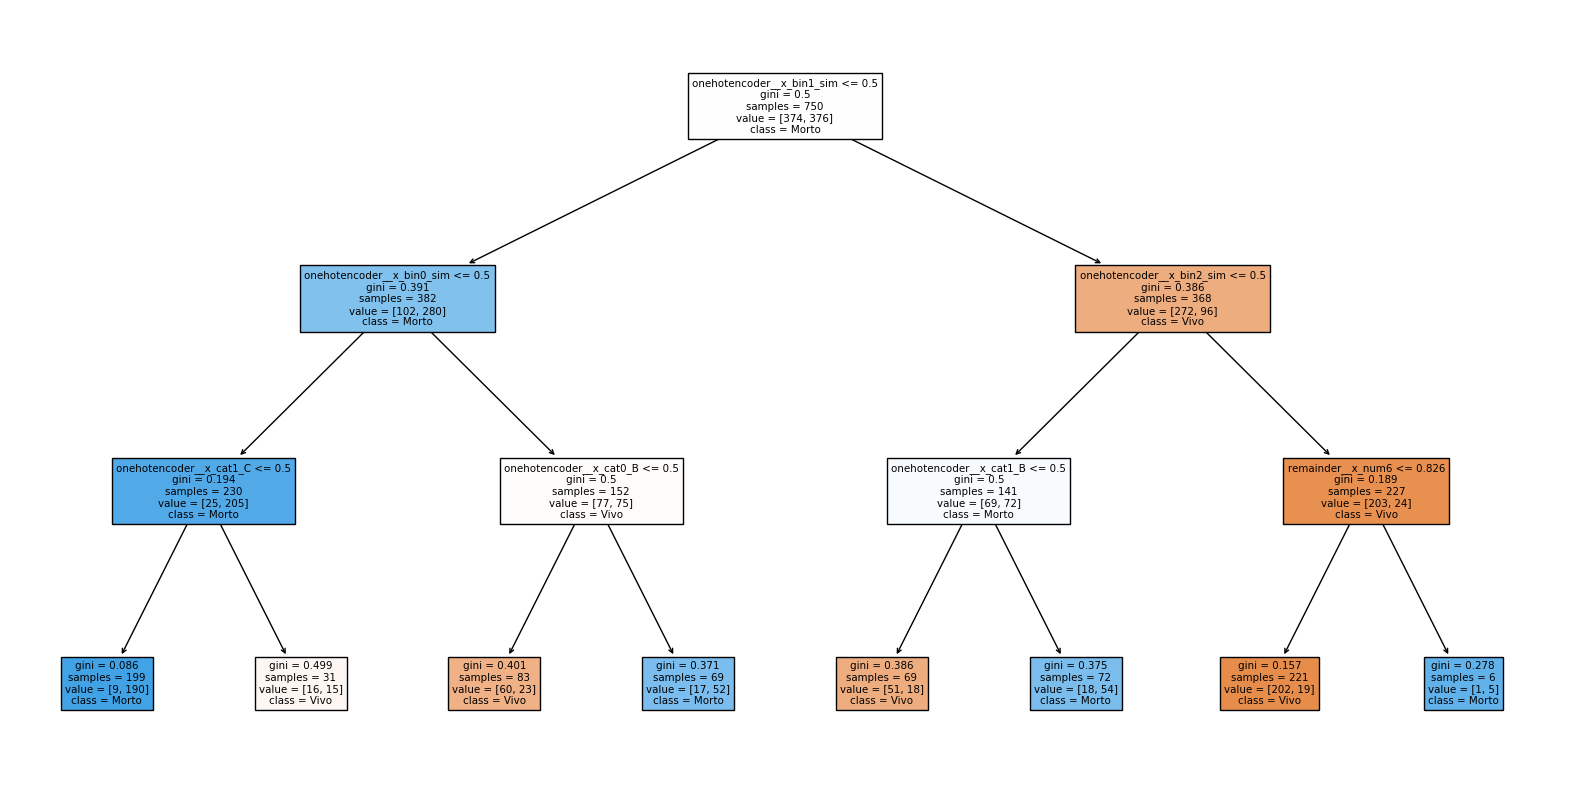

In [11]:
# Visualização da Árvore de Decisão
plt.figure(figsize=(20,10))

plot_tree(classificador, 
          filled = True, #Coloração das caixas do grafico
          class_names = ['Vivo', 'Morto'],
          feature_names=x_columns)

plt.show()

## **Forestas Aleatórias - Random Forest**

Random Forest é um método de aprendizado ensemble que opera construindo uma multitude de árvores de decisão durante o treinamento e produzindo a classe que é a moda das classes (classificação) ou a média das previsões (regressão) das árvores individuais. Random Forests corrige o hábito das árvores de decisão de overfitting para seu conjunto de treinamento.

**Principais Hiperparâmetros**

- **`n_estimators`**: 
  - **Descrição**: Número de árvores na floresta.
  - **Valor padrão**: 100.
  - **Impacto**: Mais árvores aumentam a precisão, mas também o custo computacional.

- **`criterion`**:
  - **Descrição**: A função para medir a qualidade de uma divisão.
  - **Opções**: "gini" para a impureza de Gini, "entropy" para o ganho de informação.
  
- **`max_depth`**:
  - **Descrição**: Profundidade máxima das árvores.
  - **Valor padrão**: `None` (nós são expandidos até que todas as folhas sejam puras ou até que contenham menos do que `min_samples_split` amostras).

- **`min_samples_split`**:
  - **Descrição**: Número mínimo de amostras requeridas para dividir um nó interno.
  - **Valor padrão**: 2.

- **`min_samples_leaf`**:
  - **Descrição**: Número mínimo de amostras requeridas para estar em um nó folha.
  - **Valor padrão**: 1.

- **`max_features`**:
  - **Descrição**: Número de características a considerar quando procurar pela melhor divisão.
  - **Opções**: "auto", "sqrt", "log2".

- **`max_leaf_nodes`**:
  - **Descrição**: Cresce árvores com `max_leaf_nodes` no melhor primeiro modo.
  - **Valor padrão**: `None`.

- **`min_impurity_decrease`**:
  - **Descrição**: Um nó será dividido se a divisão induzir uma diminuição da impureza maior ou igual a este valor.
  - **Valor padrão**: 0.0.

- **`bootstrap`**:
  - **Descrição**: Se as amostras de bootstrap são usadas para construir árvores. Se `False`, toda a base de dados é usada para construir cada árvore.
  - **Valor padrão**: `True`.

- **`oob_score`**:
  - **Descrição**: Se deve usar amostras out-of-bag para estimar a precisão geral.
  - **Valor padrão**: `False`.

**Vantagens do Random Forest**

- **Robustez**: Muito eficaz para uma grande variedade de problemas de classificação e regressão.
- **Desempenho**: Geralmente oferece alta precisão, lidando bem com outliers e características categóricas.

**Desvantagens do Random Forest**

- **Complexidade**: Mais complexo e requer mais recursos computacionais do que árvores de decisão únicas.
- **Interpretabilidade**: Menos interpretável do que uma única árvore de decisão devido à sua natureza ensemble.


In [12]:
from sklearn.ensemble import RandomForestClassifier
classificador = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state = 0)

**********************************************************************
Relatório de Classificação para o Conjunto de Treino :

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       374
           1       1.00      1.00      1.00       376

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750

*******************************************************
Matriz de Confusão para o Conjunto de Treino :

[[374   0]
 [  0 376]]
**********************************************************************


**********************************************************************
Relatório de Classificação para o Conjunto de Teste :

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       124
           1       0.94      0.85      0.89       126

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250

*******************************************************
Matriz de Confusão para o Conjunto de Teste :

[[117   7]
 [ 19 107]]
**********************************************************************


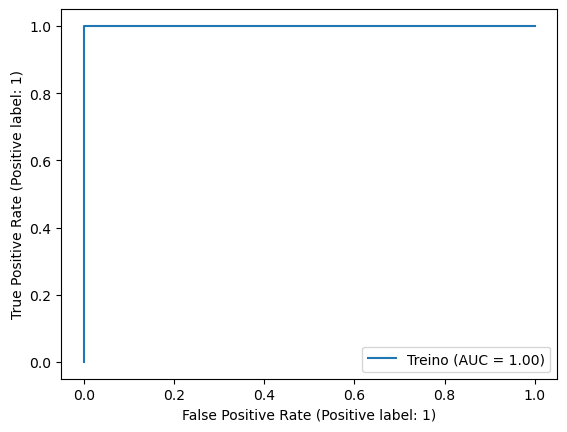

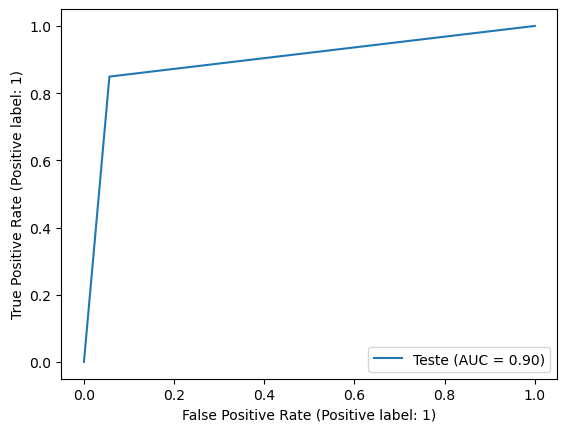

In [13]:
#######################################################################################
# Treinamento do Modelo
classificador.fit(x_treino, y_treino)

# Avaliação no conjunto de teste  # Relatório de classificação
previsoes = classificador.predict(x_teste)
avaliar_modelo(y_teste, previsoes, "Teste")
#######################################################################################

## Boosting (ex.: AdaBoost, Gradient Boosting, XGBoost, LightGBM, CatBoost)
Técnicas que criam uma sequência de modelos que corrigem os erros dos modelos anteriores para melhorar a performance.

Boosting é uma técnica de machine learning para construir um modelo preditivo forte a partir de várias modelos preditivos fracos. Esta abordagem melhora a capacidade do modelo de generalizar bem para dados não vistos. Os algoritmos de boosting mais conhecidos incluem AdaBoost, Gradient Boosting, XGBoost, LightGBM e CatBoost.

Cada algoritmo de boosting tem suas particularidades, vantagens e desvantagens. A escolha entre eles depende do problema específico, da natureza dos dados, dos recursos computacionais disponíveis e da experiência do usuário. Experimentação e ajuste fino dos hiperparâmetros são cruciais para aproveitar ao máximo cada algoritmo.


### **AdaBoost (Adaptive Boosting)**

- **Descrição**: AdaBoost é um dos primeiros algoritmos de boosting, que ajusta iterativamente os pesos das observações com base nos erros da iteração anterior, melhorando o modelo em áreas onde ele está performando mal.
- **Hiperparâmetros Principais**:
  - `n_estimators`: Número de modelos a serem incluídos na sequência.
  - `learning_rate`: Diminui a contribuição de cada classificador pela taxa de aprendizado.
  - `algorithm`: Tipo de algoritmo AdaBoost, geralmente "SAMME.R" ou "SAMME".


In [14]:
from sklearn.ensemble import AdaBoostClassifier
classificador = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)

**********************************************************************
Relatório de Classificação para o Conjunto de Treino :

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       374
           1       0.96      0.96      0.96       376

    accuracy                           0.96       750
   macro avg       0.96      0.96      0.96       750
weighted avg       0.96      0.96      0.96       750

*******************************************************
Matriz de Confusão para o Conjunto de Treino :

[[359  15]
 [ 14 362]]
**********************************************************************


**********************************************************************
Relatório de Classificação para o Conjunto de Teste :

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       124
           1       0.92      0.85      0.88       126

    accuracy                           0.89       250
   macro avg       0.89      0.89      0.89       250
weighted avg       0.89      0.89      0.89       250

*******************************************************
Matriz de Confusão para o Conjunto de Teste :

[[115   9]
 [ 19 107]]
**********************************************************************


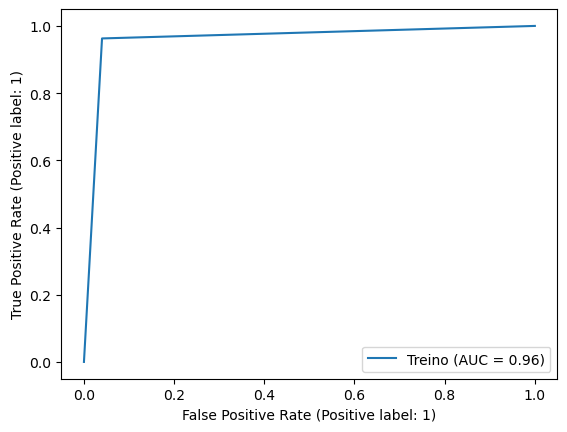

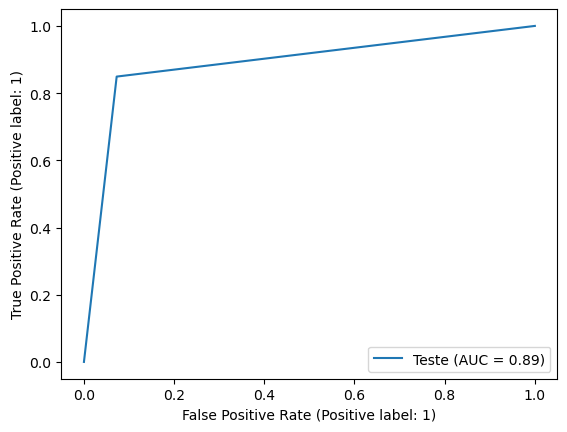

In [15]:
#######################################################################################
# Treinamento do Modelo
classificador.fit(x_treino, y_treino)

# Avaliação no conjunto de teste  # Relatório de classificação
previsoes = classificador.predict(x_teste)
avaliar_modelo(y_teste, previsoes, "Teste")
#######################################################################################

### **Gradient Boosting**

- **Descrição**: Melhora o modelo adicionando iterativamente modelos que corrigem os erros cometidos pelos modelos anteriores baseados em gradiente descendente.
- **Hiperparâmetros Principais**:
  - `n_estimators`: Número de estágios de boosting a serem executados.
  - `learning_rate`: Taxa na qual o boosting é aplicado para reduzir o overfitting.
  - `max_depth`: Profundidade máxima de cada árvore.


In [16]:
from sklearn.ensemble import GradientBoostingClassifier
classificador = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

**********************************************************************
Relatório de Classificação para o Conjunto de Treino :

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       374
           1       1.00      1.00      1.00       376

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750

*******************************************************
Matriz de Confusão para o Conjunto de Treino :

[[374   0]
 [  1 375]]
**********************************************************************


**********************************************************************
Relatório de Classificação para o Conjunto de Teste :

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       124
           1       0.95      0.91      0.93       126

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250

*******************************************************
Matriz de Confusão para o Conjunto de Teste :

[[118   6]
 [ 11 115]]
**********************************************************************


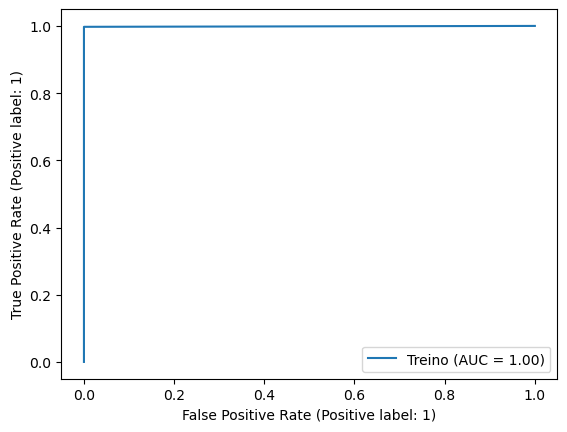

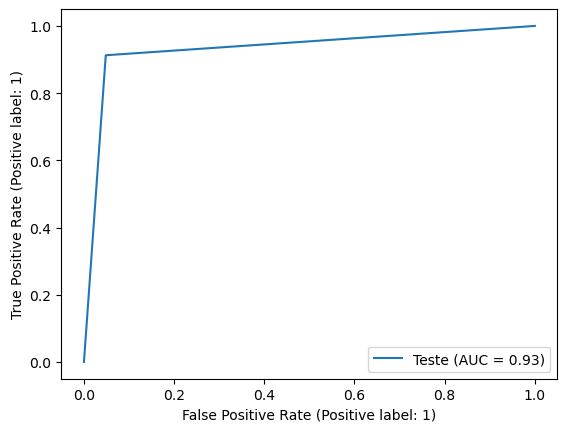

In [17]:
#######################################################################################
# Treinamento do Modelo
classificador.fit(x_treino, y_treino)

# Avaliação no conjunto de teste  # Relatório de classificação
previsoes = classificador.predict(x_teste)
avaliar_modelo(y_teste, previsoes, "Teste")
#######################################################################################

### **XGBoost (eXtreme Gradient Boosting)**

- **Pacote**: `xgboost`
- **Descrição**: Otimiza o Gradient Boosting Machine para maior eficiência, flexibilidade e portabilidade, se tornando muito popular em competições de ciência de dados.
- **Hiperparâmetros Principais**:
  - `n_estimators`: Número total de árvores a serem construídas.
  - `learning_rate`: Taxa de aprendizado.
  - `max_depth`: Profundidade máxima de cada árvore.
  - `subsample`: Fração de amostras a serem usadas para treinar cada árvore.
  - `colsample_bytree`: Fração de características a serem usadas para treinar cada árvore.


In [18]:
import xgboost as xgb
classificador = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, use_label_encoder=False, eval_metric='logloss', random_state=42)

**********************************************************************
Relatório de Classificação para o Conjunto de Treino :

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       374
           1       0.99      0.99      0.99       376

    accuracy                           0.99       750
   macro avg       0.99      0.99      0.99       750
weighted avg       0.99      0.99      0.99       750

*******************************************************
Matriz de Confusão para o Conjunto de Treino :

[[370   4]
 [  4 372]]
**********************************************************************


**********************************************************************
Relatório de Classificação para o Conjunto de Teste :

              precision    recall  f1-score   support

           0       0.89      0.96      0.93       124
           1       0.96      0.89      0.92       126

    accuracy                           0.92       250
   macro avg       0.93      0.92      0.92       250
weighted avg       0.93      0.92      0.92       250

*******************************************************
Matriz de Confusão para o Conjunto de Teste :

[[119   5]
 [ 14 112]]
**********************************************************************


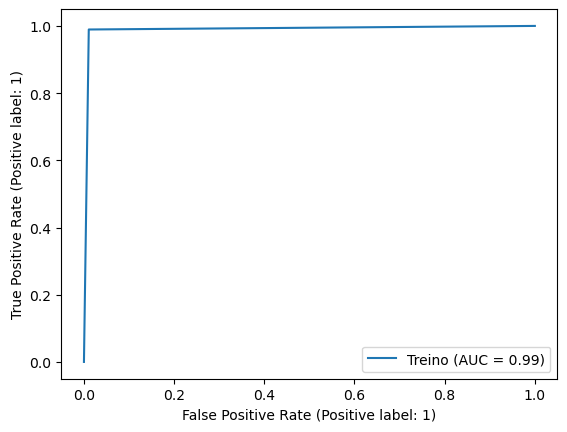

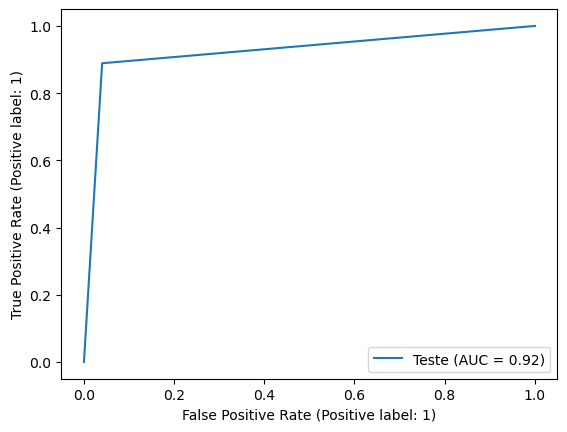

In [19]:
#######################################################################################
# Treinamento do Modelo
classificador.fit(x_treino, y_treino)

# Avaliação no conjunto de teste  # Relatório de classificação
previsoes = classificador.predict(x_teste)
avaliar_modelo(y_teste, previsoes, "Teste")
#######################################################################################

### **LightGBM (Light Gradient Boosting Machine)**

- **Pacote**: `lightgbm`
- **Descrição**: Otimiza o tradicional Gradient Boosting, oferecendo treinamento mais rápido, maior eficiência, menor uso de memória e melhor precisão.
- **Hiperparâmetros Principais**:
  - `num_leaves`: Número de folhas em cada árvore.
  - `learning_rate`: Taxa de aprendizado.
  - `n_estimators`: Número de árvores a serem construídas.
  - `max_depth`: Limitação na profundidade máxima de cada árvore para prevenir overitting.


In [20]:
import lightgbm as lgb
classificador = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=-1, random_state=42)

[LightGBM] [Info] Number of positive: 376, number of negative: 374
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000565 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2547
[LightGBM] [Info] Number of data points in the train set: 750, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501333 -> initscore=0.005333
[LightGBM] [Info] Start training from score 0.005333
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


**********************************************************************
Relatório de Classificação para o Conjunto de Teste :

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       124
           1       0.97      0.92      0.95       126

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250

*******************************************************
Matriz de Confusão para o Conjunto de Teste :

[[121   3]
 [ 10 116]]
**********************************************************************


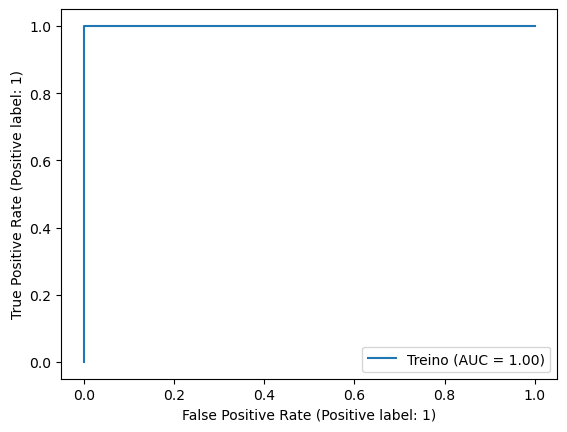

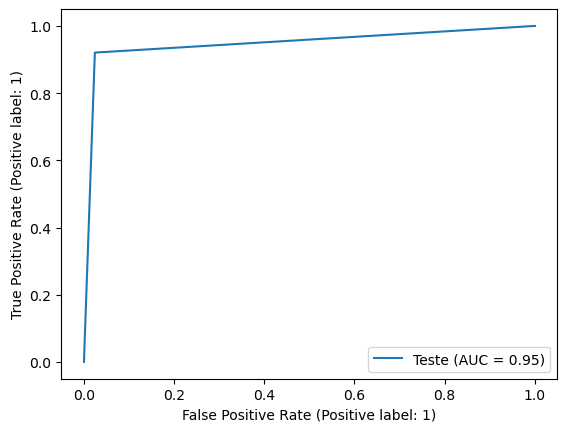

In [21]:
#######################################################################################
# Treinamento do Modelo
classificador.fit(x_treino, y_treino)

# Avaliação no conjunto de teste  # Relatório de classificação
previsoes = classificador.predict(x_teste)
avaliar_modelo(y_teste, previsoes, "Teste")
#######################################################################################

### **CatBoost (Categorical Boosting)**

- **Pacote**: `catboost`
- **Descrição**: Especializado em lidar com variáveis categóricas sem a necessidade de pré-processamento extensivo. Oferece um bom desempenho com uma configuração mínima.
- **Hiperparâmetros Principais**:
  - `iterations`: Número de árvores a serem construídas.
  - `learning_rate`: Taxa de aprendizado.
  - `depth`: Profundidade das árvores.
  - `l2_leaf_reg`: Coeficiente para o termo de regularização L2 do custo dasfolhas.


In [22]:
from catboost import CatBoostClassifier
classificador = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=3, random_state=42, verbose=10)

0:	learn: 0.6516379	total: 148ms	remaining: 2m 28s
10:	learn: 0.3777967	total: 161ms	remaining: 14.5s
20:	learn: 0.2731634	total: 174ms	remaining: 8.12s
30:	learn: 0.2197784	total: 186ms	remaining: 5.82s
40:	learn: 0.1873693	total: 199ms	remaining: 4.65s
50:	learn: 0.1585625	total: 213ms	remaining: 3.97s
60:	learn: 0.1382093	total: 238ms	remaining: 3.67s
70:	learn: 0.1197563	total: 250ms	remaining: 3.28s
80:	learn: 0.1070378	total: 263ms	remaining: 2.99s
90:	learn: 0.0922501	total: 278ms	remaining: 2.77s
100:	learn: 0.0826813	total: 293ms	remaining: 2.6s
110:	learn: 0.0758128	total: 304ms	remaining: 2.43s
120:	learn: 0.0675756	total: 317ms	remaining: 2.31s
130:	learn: 0.0606727	total: 332ms	remaining: 2.2s
140:	learn: 0.0560250	total: 346ms	remaining: 2.11s
150:	learn: 0.0499492	total: 357ms	remaining: 2.01s
160:	learn: 0.0454708	total: 370ms	remaining: 1.93s
170:	learn: 0.0420952	total: 381ms	remaining: 1.85s
180:	learn: 0.0384280	total: 393ms	remaining: 1.78s
190:	learn: 0.0359452	to

**********************************************************************
Relatório de Classificação para o Conjunto de Teste :

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       124
           1       0.96      0.95      0.96       126

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250

*******************************************************
Matriz de Confusão para o Conjunto de Teste :

[[119   5]
 [  6 120]]
**********************************************************************


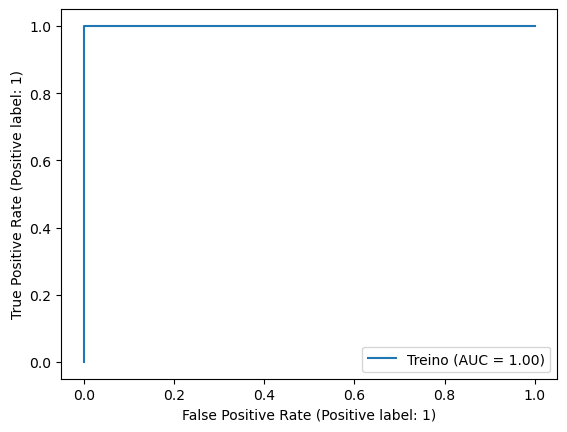

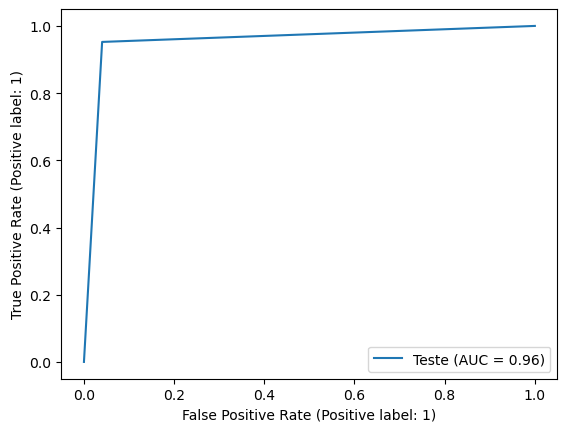

In [23]:
#######################################################################################
# Treinamento do Modelo
classificador.fit(x_treino, y_treino)

# Avaliação no conjunto de teste  # Relatório de classificação
previsoes = classificador.predict(x_teste)
avaliar_modelo(y_teste, previsoes, "Teste")
#######################################################################################

# Algoritmos Baseados em Instância

Os algoritmos baseados em instâncias, também conhecidos como algoritmos "lazy learning", são métodos de aprendizado de máquina que generalizam a partir do conjunto de dados de treinamento para o espaço de instâncias de forma a fazer predições. Eles se diferenciam por não construírem explicitamente um modelo. Em vez disso, armazenam instâncias dos dados de treinamento e aprendem a generalizar para novos dados no momento da predição, usando essas instâncias armazenadas. Os mais conhecidos são o K-Nearest Neighbors (KNN) e o Learning Vector Quantization (LVQ). 

### **K-Nearest Neighbors (KNN)**

- **Descrição**: O KNN é um dos algoritmos de classificação mais simples, baseando-se na proximidade para realizar suas predições. Para um dado ponto de teste, o KNN busca no conjunto de treinamento os `k` vizinhos mais próximos e realiza uma votação majoritária (para classificação) ou média (para regressão) entre os vizinhos para determinar a predição.

- **Hiperparâmetros Principais**:
  - `n_neighbors`: Número de vizinhos a considerar. Um valor maior suaviza a decisão de fronteira, potencialmente reduzindo o overfitting.
  - `weights`: Pode ser `uniforme` (todos os vizinhos têm o mesmo peso) ou `distance` (vizinhos mais próximos têm um peso maior).
  - `metric`: Métrica de distância a ser usada. Por exemplo, `euclidean`, `manhattan`, `minkowski`.

- **Vantagens**:
  - Simples de entender e implementar.
  - Naturalmente não paramétrico, o que significa que funciona bem para problemas de classificação complexos.

- **Desvantagens**:
  - Requer um tempo de consulta significativo, pois precisa pesquisar os vizinhos mais próximos no conjunto de treinamento.
  - Alto consumo de memória, pois precisa armazenar todos os dados de treinamento.
  - Sensível a características irrelevantes e à escala dos dados.

In [24]:
from sklearn.neighbors import KNeighborsClassifier
classificador = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)

**********************************************************************
Relatório de Classificação para o Conjunto de Treino :

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       374
           1       0.91      0.90      0.91       376

    accuracy                           0.91       750
   macro avg       0.91      0.91      0.91       750
weighted avg       0.91      0.91      0.91       750

*******************************************************
Matriz de Confusão para o Conjunto de Treino :

[[341  33]
 [ 37 339]]
**********************************************************************


**********************************************************************
Relatório de Classificação para o Conjunto de Teste :

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       124
           1       0.86      0.83      0.85       126

    accuracy                           0.85       250
   macro avg       0.85      0.85      0.85       250
weighted avg       0.85      0.85      0.85       250

*******************************************************
Matriz de Confusão para o Conjunto de Teste :

[[107  17]
 [ 21 105]]
**********************************************************************


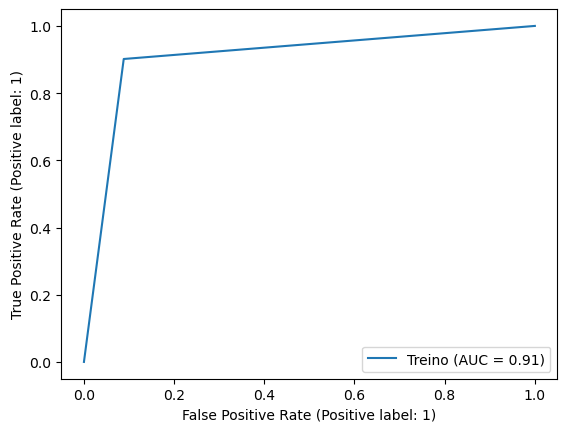

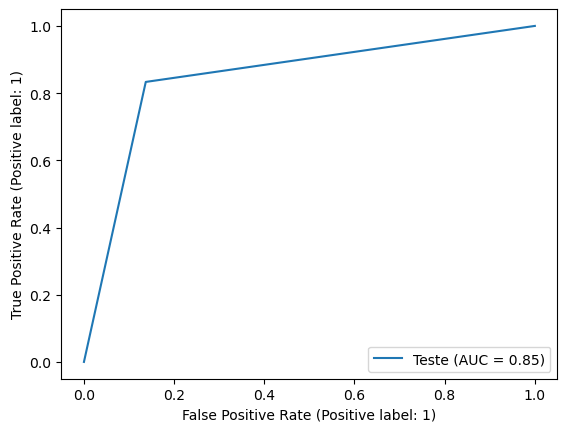

In [25]:
#######################################################################################
# Treinamento do Modelo
classificador.fit(x_treino, y_treino)

# Avaliação no conjunto de teste  # Relatório de classificação
previsoes = classificador.predict(x_teste)
avaliar_modelo(y_teste, previsoes, "Teste")
#######################################################################################

### **Learning Vector Quantization (LVQ)**

- **Descrição**: LVQ é uma técnica de aprendizado supervisionado que treina protótipos (vetores de características representativos) para cada classe. A classificação é realizada encontrando o protótipo mais próximo do ponto de teste e atribuindo a classe desse protótipo.

- **Hiperparâmetros Principais**:
  - `n_prototypes`: Número de protótipos a serem criados. Influencia a granularidade do espaço de características.
  - `learning_rate`: Taxa de aprendizado para ajustar os protótipos durante o treinamento.
  - `epochs`: Número de passagens pelo conjunto de treinamento para ajustar os protótipos.

- **Vantagens**:
  - Permite a criação de um modelo mais intuitivo, pois as classes são representadas por protótipos.
  - Eficiente para conjuntos de dados grandes após a fase de treinamento, pois a classificação requer comparação apenas com os protótipos.

- **Desvantagens**:
  - A escolha do número e da localização inicial dos protótipos pode afetar significativamente o desempenho.
  - Pode ser sensível ao overfitting se muitos protótipos forem usados.

# Algoritmos Lineares

**Vantagens dos Algoritmos Lineares**

- **Eficiência**: São computacionalmente eficientes, tornando-os atraentes para conjuntos de dados grandes.
- **Interpretabilidade**: Os modelos lineares são fáceis de interpretar, com cada peso indicando a importância da característica correspondente na previsão.
- **Simplicidade**: Facilidade de implementação e compreensão.

**Desvantagens**

- **Limitação a Relações Lineares**: Eles assumem uma relação linear entre as características e a variável alvo, o que pode não ser adequado para todos os conjuntos de dados.
- **Sensibilidade a Outliers**: Especialmente a regressão linear pode ser sensível a outliers nos dados, o que pode distorcer significativamente o ajuste do modelo.

Algoritmos lineares formam a base para entender muitos conceitos avançados em machine learning. Eles são uma ferramenta poderosa para muitas aplicações devido à sua simplicidade e eficácia, mas é importante considerar suas limitações e garantir que as suposições do modelo se alinhem com os dados em mãos.

## **Regressão Logística**

A Regressão Logística é um algoritmo de aprendizado supervisionado que estima a probabilidade de uma variável dependente binária ser classificada como pertencente a uma das duas classes. A função logística, também conhecida como função sigmoide, transforma a saída linear do modelo em uma probabilidade, variando de 0 a 1, permitindo sua interpretação como a probabilidade de pertencer à classe 1.

**Hiperparâmetros Principais no `scikit-learn`**

- **`solver`**:
  - **Descrição**: Algoritmo a ser usado no problema de otimização.
  - **Valores Comuns**: `'liblinear'`, `'newton-cg'`, `'lbfgs'`, `'sag'`, `'saga'`.
  - **Recomendação**: `'liblinear'` é bom para pequenos conjuntos de dados, enquanto `'sag'` e `'saga'` são mais rápidos para grandes.

- **`penalty`**:
  - **Descrição**: Especifica a norma usada na penalização.
  - **Valores Comuns**: `'l1'`, `'l2'`, `'elasticnet'`, `'none'`.

- **`C`**:
  - **Descrição**: Inverso da força de regularização; valores menores especificam regularização mais forte.
  - **Tipo**: Float.
  - **Impacto**: Ajuda a controlar o overfitting.

- **`max_iter`**:
  - **Descrição**: Número máximo de iterações do algoritmo de otimização.
  - **Tipo**: Inteiro.

**Vantagens da Regressão Logística**

- **Interpretabilidade**: Os coeficientes do modelo podem ser interpretados como medidas do efeito de cada variável na probabilidade de observar a classe de interesse, tornando o modelo transparente e fácil de interpretar.
- **Eficiência**: É computacionalmente menos intensiva em comparação com modelos mais complexos, tornando-a rápida para treinar.
- **Probabilidades de Saída**: Fornece probabilidades que podem ser úteis para determinar a certeza da classificação.

**Desvantagens da Regressão Logística**

- **Linearidade**: Assume uma relação linear entre as variáveis independentes e o logit da variável dependente, o que pode não ser adequado para todas as relações entre variáveis.
- **Limitação a Classificação Binária**: Embora possa ser estendida para classificação multiclasse (por exemplo, usando a abordagem um-contra-todos), é naturalmente adequada apenas para problemas binários.
- **Sensibilidade a Variáveis Irrelevantes**: A inclusão de variáveis não relacionadas ao resultado pode reduzir o desempenho do modelo.

A Regressão Logística é uma ferramenta poderosa e versátil para problemas de classificação, especialmente quando a probabilidade de pertencimento a uma classe é um componente crítico da análise.


In [26]:
from sklearn.linear_model import LogisticRegression
classificador = LogisticRegression(random_state=1)

**********************************************************************
Relatório de Classificação para o Conjunto de Treino :

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       374
           1       0.93      0.93      0.93       376

    accuracy                           0.93       750
   macro avg       0.93      0.93      0.93       750
weighted avg       0.93      0.93      0.93       750

*******************************************************
Matriz de Confusão para o Conjunto de Treino :

[[348  26]
 [ 25 351]]
**********************************************************************


**********************************************************************
Relatório de Classificação para o Conjunto de Teste :

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       124
           1       0.91      0.85      0.88       126

    accuracy                           0.88       250
   macro avg       0.88      0.88      0.88       250
weighted avg       0.88      0.88      0.88       250

*******************************************************
Matriz de Confusão para o Conjunto de Teste :

[[113  11]
 [ 19 107]]
**********************************************************************


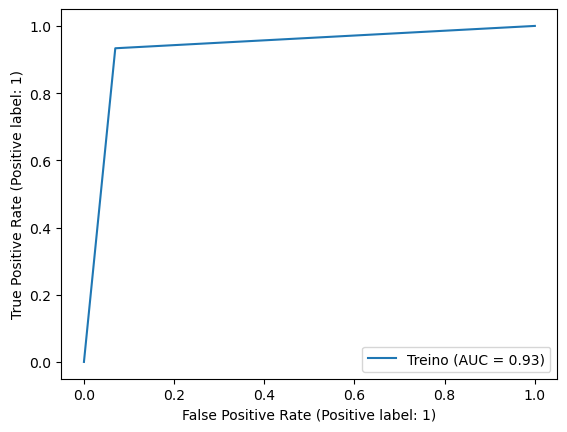

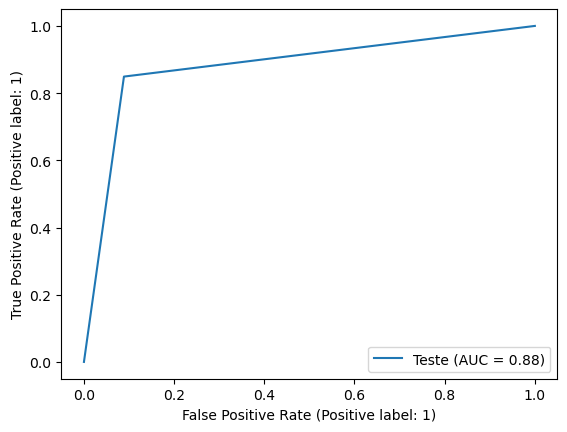

In [27]:
#######################################################################################
# Treinamento do Modelo
classificador.fit(x_treino, y_treino)

# Avaliação no conjunto de teste  # Relatório de classificação
previsoes = classificador.predict(x_teste)
avaliar_modelo(y_teste, previsoes, "Teste")
#######################################################################################

## **Máquinas de Vetores de Suporte (SVM)**

As SVMs são um conjunto de métodos de aprendizado supervisionado que buscam encontrar o hiperplano que melhor separa as diferentes classes no espaço de características. Para problemas não linearmente separáveis, as SVMs utilizam o "truque do kernel" para mapear os dados para um espaço de dimensão superior onde eles se tornam separáveis.

**Hiperparâmetros Principais no `scikit-learn`**

- **`C`**:
  - **Descrição**: Parâmetro de regularização que controla a compensação entre obter o hiperplano de margem máxima e minimizar o erro de classificação. Um valor pequeno de `C` torna a superfície de decisão suave, enquanto um valor alto visa classificar todos os exemplos de treinamento corretamente, potencialmente causando overfitting.
  - **Tipo**: Float.

- **`kernel`**:
  - **Descrição**: Tipo do kernel usado no algoritmo. Ele transforma o espaço de entrada em um novo espaço de características.
  - **Valores Comuns**: `'linear'`, `'poly'`, `'rbf'`, `'sigmoid'`, `'precomputed'`.
  - **Impacto**: Escolher o kernel certo é crucial para o desempenho do modelo.

- **`degree`** (somente para kernel `'poly'`):
  - **Descrição**: Grau do polinômio do kernel. Relevante apenas para o kernel `'poly'`.
  - **Tipo**: Inteiro.

- **`gamma`** (para kernels `'rbf'`, `'poly'`, e `'sigmoid'`):
  - **Descrição**: Coeficiente do kernel para `'rbf'`, `'poly'` e `'sigmoid'`.
  - **Impacto**: Um valor baixo de `gamma` implica em uma gaussiana com grande variância. Por outro lado, um valor alto leva a uma variância baixa, tornando a influência de cada exemplo de treinamento mais localizada.

- **`coef0`** (para kernels `'poly'` e `'sigmoid'`):
  - **Descrição**: Termo independente no kernel.
  - **Tipo**: Float.

**Vantagens das SVMs**

- **Efetividade**: Muito eficazes em espaços de alta dimensão e em casos onde o número de dimensões é maior que o número de amostras.
- **Versatilidade**: A função de kernel pode ser customizada para a necessidade do problema, oferecendo uma grande flexibilidade.
- **Eficiência em Memória**: Usa um subconjunto de pontos de treinamento (vetores de suporte) na função de decisão, tornando-o eficiente em termos de memória.

**Desvantagens das SVMs**

- **Seleção de Kernel**: A escolha do kernel e dos parâmetros do kernel pode ser complexa e tem grande influência no desempenho do modelo.
- **Escalabilidade**: Não é particularmente eficiente em grandes conjuntos de dados devido ao seu requisito de otimização quadrática.
- **Interpretabilidade**: Modelos SVM, especialmente aqueles com kernels não lineares, podem ser difíceis de interpretar em comparação com modelos mais simples.

As SVMs são poderosas para uma ampla gama de problemas de classificação e regressão, especialmente para dados complexos e de alta dimensão. No entanto, a escolha cuidadosa dos hiperparâmetros e a consideração de suas limitações são essenciais para maximizar seu desempenho.


In [28]:
from sklearn.svm import SVC
classificador = SVC(kernel='rbf', random_state=1, C = 2.0) # 2 -> 4

**********************************************************************
Relatório de Classificação para o Conjunto de Treino :

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       374
           1       0.97      0.97      0.97       376

    accuracy                           0.97       750
   macro avg       0.97      0.97      0.97       750
weighted avg       0.97      0.97      0.97       750

*******************************************************
Matriz de Confusão para o Conjunto de Treino :

[[361  13]
 [ 12 364]]
**********************************************************************


**********************************************************************
Relatório de Classificação para o Conjunto de Teste :

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       124
           1       0.91      0.84      0.88       126

    accuracy                           0.88       250
   macro avg       0.88      0.88      0.88       250
weighted avg       0.88      0.88      0.88       250

*******************************************************
Matriz de Confusão para o Conjunto de Teste :

[[114  10]
 [ 20 106]]
**********************************************************************


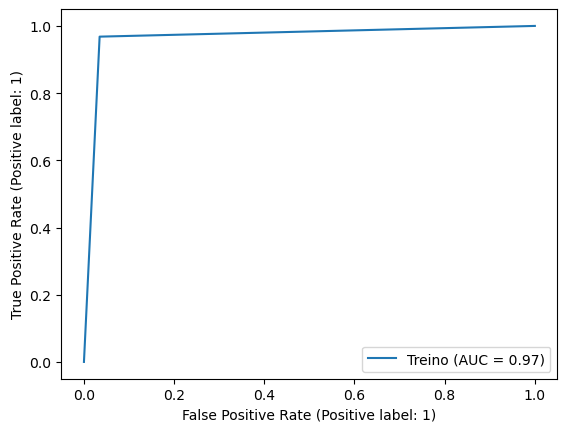

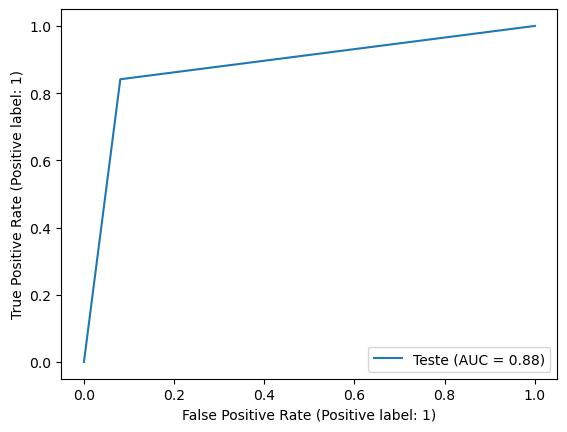

In [29]:
#######################################################################################
# Treinamento do Modelo
classificador.fit(x_treino, y_treino)

# Avaliação no conjunto de teste  # Relatório de classificação
previsoes = classificador.predict(x_teste)
avaliar_modelo(y_teste, previsoes, "Teste")
#######################################################################################

# Métodos Baseados em Redes Neurais

As redes neurais são inspiradas pela estrutura e funcionamento do cérebro humano, consistindo em nós (neurônios) interconectados que trabalham em conjunto para realizar tarefas específicas. Os Perceptrons são a forma mais simples de rede neural, enquanto as Redes Neurais Artificiais (ANNs) apresentam estruturas mais complexas.

Os métodos baseados em redes neurais são extremamente versáteis e poderosos, capazes de aprender desde tarefas simples até as mais complexas funções cognitivas, como visão computacional e processamento de linguagem natural. Contudo, o sucesso deles depende da escolha adequada da arquitetura, do ajuste fino dos hiperparâmetros e da disponibilidade de dados de treinamento de alta qualidade.


### **Perceptrons e Redes Neurais Artificiais (ANN)**
Modelos compostos por camadas de neurônios, capazes de capturar relações complexas nos dados.


- **Descrição**: O Perceptron é um classificador binário que representa a unidade básica de uma rede neural. Foi inventado em 1957 por Frank Rosenblatt. Ele toma várias entradas binárias, as pondera, e produz uma única saída binária baseada em um limiar.
- **Funcionamento**: Se a soma ponderada das entradas excede um certo limiar, o Perceptron ativa a saída; caso contrário, não ativa.
- **Modelo**: \(f(x) = \{1 \text{ se } w \cdot x + b > 0; 0 \text{ de outra forma}\}\), onde \(w\) são os pesos, \(x\) são as entradas, e \(b\) é o bias.
- **Limitações**: Capaz de modelar apenas funções linearmente separáalidade.


### **Redes Neurais Artificiais (ANNs)**

- **Descrição**: ANNs são redes de perceptrons (ou unidades mais avançadas) organizadas em camadas: uma camada de entrada, uma ou mais camadas ocultas e uma camada de saída. São capazes de modelar relações complexas e não-lineares entre entradas e saídas.
- **Funcionamento**: A informação flui da camada de entrada para a camada de saída, possivelmente passando por múltiplas camadas ocultas. Cada conexão entre os neurônios tem um peso associado que é ajustado durante o treinamento para minimizar a diferença entre a saída da rede e a saída esperada.
- **Modelo**: Varia bastante, mas todos compartilham o princípio básico de combinar entradas ponderadas para produzir uma saída, usando funções de ativação não-lineares (como ReLU, sigmoid ou tanh) para permitir aprendizado de não-linearidades.

### **Vantagens dos Métodos Baseados em Redes Neurais**

- **Flexibilidade**: Capazes de modelar praticamente qualquer função não-linear, dado um número suficiente de neurônios e camadas.
- **Generalização**: Com treinamento e regularização adequados, podem generalizar bem para dados não vistos.

### **Desvantagens**

- **Complexidade e Custo Computacional**: Requerem uma quantidade significativa de dados e poder computacional para treinar efetivamente.
- **Risco de Overfitting**: Especialmente em redes muito grandes sem regularização adequada.
- **Interpretabilidade**: As ANNs, especialmente as profundas, podem ser como caixas-pretas, dificultando a compreensão de como as decisões são feitas.



In [30]:
from sklearn.linear_model import Perceptron
classificador = Perceptron(max_iter=1000, tol=1e-3, random_state=42)

**********************************************************************
Relatório de Classificação para o Conjunto de Treino :

              precision    recall  f1-score   support

           0       0.96      0.86      0.91       374
           1       0.87      0.97      0.92       376

    accuracy                           0.91       750
   macro avg       0.92      0.91      0.91       750
weighted avg       0.92      0.91      0.91       750

*******************************************************
Matriz de Confusão para o Conjunto de Treino :

[[321  53]
 [ 12 364]]
**********************************************************************


**********************************************************************
Relatório de Classificação para o Conjunto de Teste :

              precision    recall  f1-score   support

           0       0.91      0.86      0.89       124
           1       0.87      0.92      0.90       126

    accuracy                           0.89       250
   macro avg       0.89      0.89      0.89       250
weighted avg       0.89      0.89      0.89       250

*******************************************************
Matriz de Confusão para o Conjunto de Teste :

[[107  17]
 [ 10 116]]
**********************************************************************


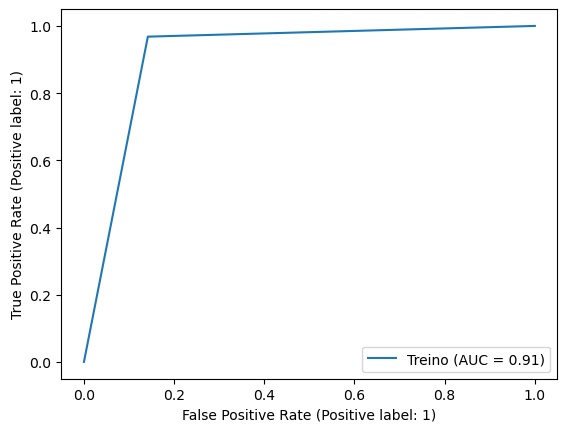

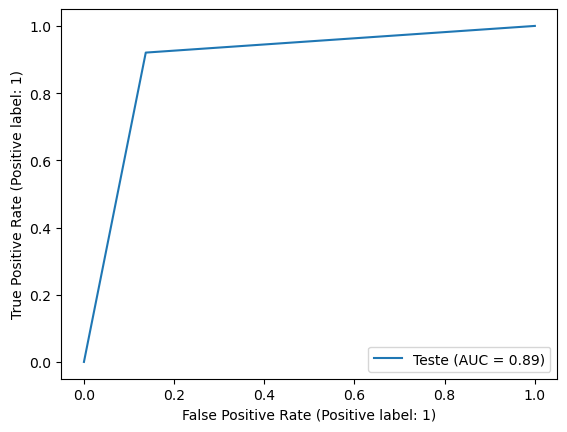

In [31]:
#######################################################################################
# Treinamento do Modelo
classificador.fit(x_treino, y_treino)

# Avaliação no conjunto de teste  # Relatório de classificação
previsoes = classificador.predict(x_teste)
avaliar_modelo(y_teste, previsoes, "Teste")
#######################################################################################

## **Redes Neurais Convolucionais (CNNs)**

CNNs são fundamentais no campo da visão computacional, oferecendo um framework poderoso para o processamento de imagens e outras tarefas que envolvem dados com uma estrutura espacial ou temporal.

**Características Principais**

- **Convoluções**: Utilizam filtros (ou kernels) para realizar operações de convolução em dados de entrada, capturando padrões espaciais como bordas e texturas.
- **Pooling**: Reduzem a dimensionalidade espacial dos dados através de operações como max pooling ou average pooling, mantendo as características mais importantes.
- **Camadas Densas**: Após várias camadas de convolução e pooling, as características aprendidas são passadas para uma ou mais camadas densas (totalmente conectadas) para classificação ou regressão.

**Estrutura Típica de uma CNN**

1. **Camada de Entrada**: Recebe a imagem original.
2. **Camadas Convolutivas**: Aplicam filtros para extrair características importantes. Cada camada pode aprender a reconhecer diferentes características com base nos padrões nos dados.
3. **Camadas de Pooling**: Reduzem o tamanho dos mapas de características, condensando informações e reduzindo o número de parâmetros.
4. **Camadas Densas (Fully-Connected)**: Funcionam como em redes neurais tradicionais, onde todas as características aprendidas são combinadas para fazer previsões ou classificações finais.
5. **Camada de Saída**: Fornece a saída final, como a classificação da imagem.

**Vantagens das CNNs**

- **Aprendizado Automático de Características**: Capazes de aprender características relevantes sem a necessidade de extração manual.
- **Eficiência em Dados de Imagem**: Projetadas especificamente para trabalhar com dados de imagem, tornando-as eficientes e eficazes para visão computacional.
- **Generalização**: Após treinadas, podem generalizar bem para novas imagens que nunca viram antes.

**Desvantagens**

- **Custo Computacional e de Dados**: Treinar CNNs pode ser computacionalmente intensivo e geralmente requer grandes conjuntos de dados.
- **Risco de Overfitting**: Sem técnicas adequadas de regularização e dados suficientes, as CNNs podem se ajustar demais aos dados de treinamento.

**Outras Aplicações**

- **Reconhecimento de Imagens**: Identificação de objetos, pessoas, cenas, etc., em imagens.
- **Classificação de Imagens**: Categorizar imagens em grupos predefinidos.
- **Detecção de Objetos**: Localizar e identificar objetos dentro de imagens.
- **Segmentação Semântica**: Classificar cada pixel de uma imagem em uma categoria.
- **Análise de Vídeo**: Aplicações em vigilância, reconhecimento facial e veículos autônomos.

**Considerações Finais**

As CNNs revolucionaram o campo da visão computacional, demonstrando uma capacidade notável de interpretar e classificar conteúdo visual. Continuam sendo uma área de pesquisa ativa, com novas arquiteturas e técnicas sendo desenvolvidas para melhorar ainda mais sua eficácia e eficiência.


## Redes Neurais Recorrentes (RNN), incluindo LSTM e GRU
Adequadas para dados sequenciais, como texto e séries temporais.

## **Redes Neurais Recorrentes (RNNs)**

As RNNs são uma arquitetura de rede neural projetada para reconhecer padrões em sequências de dados. Elas são especialmente úteis em campos como processamento de linguagem natural e análise de séries temporais.

**Princípios Chave**

- **Memória de Curto Prazo**: RNNs têm loops que permitem a persistência de informações, o que significa que informações de entradas anteriores podem influenciar a saída atual.
- **Problema do Desvanecimento do Gradiente**: Em sequências longas, RNNs simples podem perder a capacidade de aprender dependências devido ao desvanecimento ou à explosão do gradiente.

**Long Short-Term Memory (LSTM)**

LSTMs são uma extensão das RNNs que incorporam células de memória capazes de aprender dependências de longo prazo. Elas conseguem isso através de portas especializadas que controlam o fluxo de informações.

- **Portas**:
  - **Porta de Esquecimento**: Decide quais informações são descartadas do estado da célula.
  - **Porta de Entrada**: Atualiza o estado da célula com novas informações.
  - **Porta de Saída**: Decide qual será a próxima saída com base no estado atual da célula.

**Gated Recurrent Unit (GRU)**

GRUs são uma variação das LSTMs que simplificam a estrutura da célula de memória. Elas combinam a porta de esquecimento e a porta de entrada em uma única "porta de atualização" e são capazes de realizar um desempenho similar com menos complexidade computacional.

**Vantagens**

- **Modelagem de Dependências de Longo Prazo**: LSTMs e GRUs são eficazes em capturar dependências de longo prazo em sequências de dados.
- **Flexibilidade**: Podem ser aplicadas a uma ampla variedade de tarefas de sequência, como tradução automática, geração de texto e previsão de séries temporais.

**Desvantagens**

- **Complexidade Computacional**: RNNs, LSTMs e GRUs podem ser computacionalmente intensivas para treinar devido à sua complexidade.
- **Risco de Overfitting**: Como com outras redes neurais profundas, há um risco de overfitting, especialmente em conjuntos de dados menores.

As RNNs e suas variantes, LSTMs e GRUs, oferecem ferramentas poderosas para modelagem de dados sequenciais. A escolha entre LSTM e GRU pode depender da disponibilidade de recursos computacionais e do tamanho do conjunto de dados. Em muitos casos, ambas as variantes oferecem desempenho comparável, com GRUs sendo uma opção mais eficiente.


## **Perceptron Multicamada (do inglês, Multi-Layer Perceptron Classifier)**

O `MLPClassifier` é uma implementação do algoritmo Perceptron Multicamada para classificação. Utiliza uma ou mais camadas intermediárias (ocultas) além das camadas de entrada e saída, e pode ser usado para modelar relações complexas entre as entradas e saídas.

**Funcionamento Básico**

- **Camadas**: Inclui uma camada de entrada, uma ou mais camadas ocultas e uma camada de saída. Cada camada é composta por unidades (neurônios) que têm pesos e bias associados.
- **Ativação**: Funções de ativação não-lineares são aplicadas às saídas dos neurônios. As mais comuns incluem ReLU, sigmoid e tanh.
- **Backpropagation**: Para o treinamento, o MLP usa o algoritmo de retropropagação com otimização, como SGD, Adam, ou LBFGS, para ajustar os pesos e minimizar a função de custo.

**Hiperparâmetros Principais**

- **`hidden_layer_sizes`**: Define o número e o tamanho das camadas ocultas. Por exemplo, `(100,)` significa uma camada oculta com 100 neurônios.
- **`activation`**: A função de ativação para as camadas ocultas. Opções comuns incluem `'relu'`, `'tanh'`, e `'logistic'`.
- **`solver`**: O algoritmo de otimização para encontrar os pesos. Opções incluem `'adam'`, `'sgd'`, e `'lbfgs'`.
- **`alpha`**: Parâmetro de regularização L2 que ajuda a evitar overfitting ao penalizar pesos grandes.
- **`learning_rate`**: Taxa de aprendizado, relevante principalmente para o solver `'sgd'`. Pode ser `'constant'`, `'invscaling'`, ou `'adaptive'`.
- **`max_iter`**: Número máximo de iterações.

**Vantagens**

- **Flexibilidade**: Capaz de modelar relações complexas não-lineares entre as variáveis de entrada e saída.
- **Generalização**: Com a regularização adequada, pode generalizar bem para dados não vistos.

**Desvantagens**

- **Sensibilidade a Hiperparâmetros**: Requer a seleção cuidadosa de hiperparâmetros para um bom desempenho.
- **Risco de Overfitting**: Especialmente em redes com muitos parâmetros em comparação ao tamanho do conjunto de dados.
- **Custo Computacional**: Pode ser alto, especialmente para redes grandes e/ou conjuntos de dados grandes.

O `MLPClassifier` é uma ferramenta poderosa dentro do `scikit-learn` para resolver problemas de classificação. É particularmente útil quando as relações entre as variáveis de entrada e saída são complexas e não-lineares. No entanto, sua eficácia depende da escolha correta dos hiperparâmetros e da prevenção de overfitting através de técnicas como a regularização e a validação cruzada.


In [32]:
from sklearn.neural_network import MLPClassifier
# 3 -> 100 -> 100 -> 1
# 3 -> 2 -> 2 -> 1
classificador = MLPClassifier(max_iter=1500, verbose=True, tol=0.0000100,
                              solver = 'adam', activation = 'relu',
                              hidden_layer_sizes = (20,20))

Iteration 1, loss = 0.73906433
Iteration 2, loss = 0.70759621
Iteration 3, loss = 0.68285669
Iteration 4, loss = 0.66324545
Iteration 5, loss = 0.64654373
Iteration 6, loss = 0.62979498
Iteration 7, loss = 0.61361477
Iteration 8, loss = 0.59552720
Iteration 9, loss = 0.57485997
Iteration 10, loss = 0.55330311
Iteration 11, loss = 0.53068650
Iteration 12, loss = 0.50722923
Iteration 13, loss = 0.48345535
Iteration 14, loss = 0.45884850
Iteration 15, loss = 0.43544550
Iteration 16, loss = 0.41220326
Iteration 17, loss = 0.39160293
Iteration 18, loss = 0.37127902
Iteration 19, loss = 0.35392284
Iteration 20, loss = 0.33809602
Iteration 21, loss = 0.32405498
Iteration 22, loss = 0.31193185
Iteration 23, loss = 0.30101613
Iteration 24, loss = 0.29130598
Iteration 25, loss = 0.28339016
Iteration 26, loss = 0.27636392
Iteration 27, loss = 0.26985030
Iteration 28, loss = 0.26463741
Iteration 29, loss = 0.26010903
Iteration 30, loss = 0.25533727
Iteration 31, loss = 0.25154766
Iteration 32, los

**********************************************************************
Relatório de Classificação para o Conjunto de Teste :

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       124
           1       0.87      0.86      0.86       126

    accuracy                           0.86       250
   macro avg       0.86      0.86      0.86       250
weighted avg       0.86      0.86      0.86       250

*******************************************************
Matriz de Confusão para o Conjunto de Teste :

[[108  16]
 [ 18 108]]
**********************************************************************


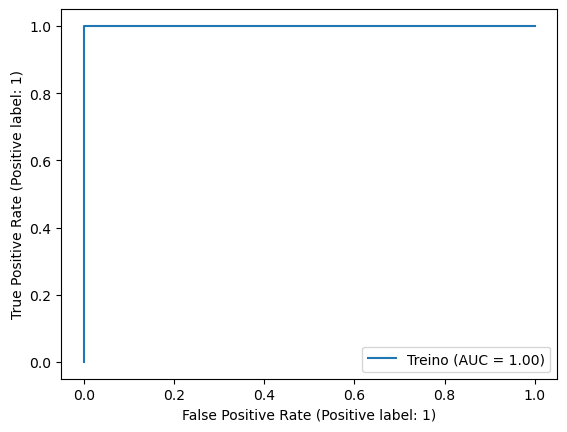

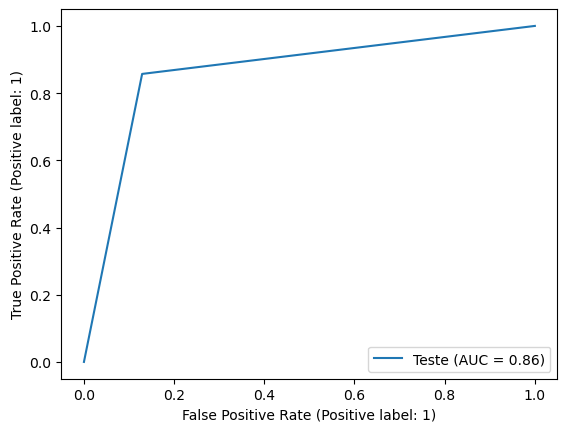

In [33]:
#######################################################################################
# Treinamento do Modelo
classificador.fit(x_treino, y_treino)

# Avaliação no conjunto de teste  # Relatório de classificação
previsoes = classificador.predict(x_teste)
avaliar_modelo(y_teste, previsoes, "Teste")
#######################################################################################

# Modelos Probabilisticos

## **Naive Bayes**

O Naive Bayes é um classificador probabilístico baseado no teorema de Bayes, com a "ingênua" suposição de independência entre os preditores. É particularmente adequado para dados de alta dimensão e é eficaz em tarefas de classificação.

- **Vantagens**:
  - Simples, rápido e eficaz em grandes datasets.
  - Bom desempenho com suposição de independência variável, mesmo quando a suposição não é completamente verdadeira.

- **Desvantagens**:
  - A suposição de independência pode não ser realista para alguns conjuntos de dados, limitando sua eficácia.
  - Sensível à distribuição dos dados; a performance pode ser afetada se a distribuição preditiva for diferente da distribuição real.


In [34]:
from sklearn.naive_bayes import GaussianNB
classificador = GaussianNB()

**********************************************************************
Relatório de Classificação para o Conjunto de Treino :

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       374
           1       0.91      0.90      0.90       376

    accuracy                           0.90       750
   macro avg       0.90      0.90      0.90       750
weighted avg       0.90      0.90      0.90       750

*******************************************************
Matriz de Confusão para o Conjunto de Treino :

[[340  34]
 [ 38 338]]
**********************************************************************


**********************************************************************
Relatório de Classificação para o Conjunto de Teste :

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       124
           1       0.94      0.86      0.90       126

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250

*******************************************************
Matriz de Confusão para o Conjunto de Teste :

[[117   7]
 [ 18 108]]
**********************************************************************


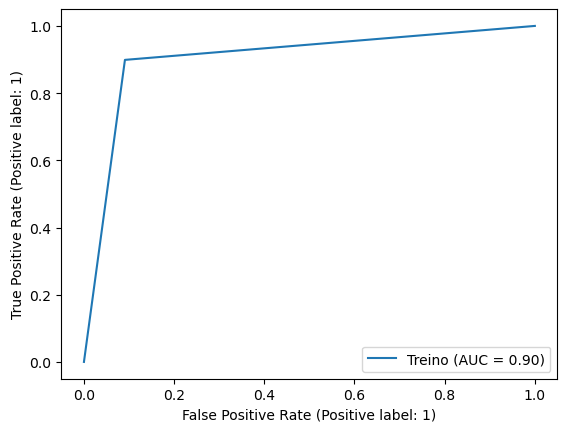

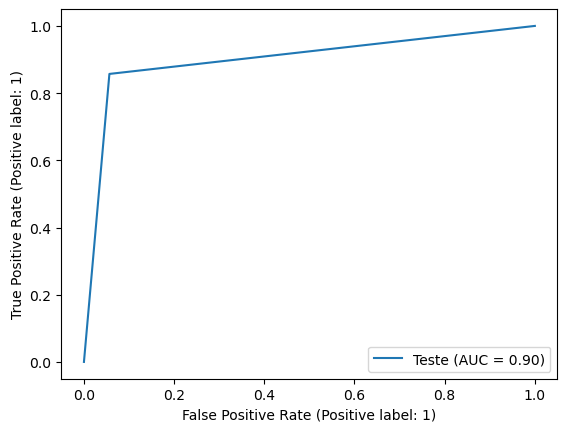

In [35]:
#######################################################################################
# Treinamento do Modelo
classificador.fit(x_treino, y_treino)

# Avaliação no conjunto de teste  # Relatório de classificação
previsoes = classificador.predict(x_teste)
avaliar_modelo(y_teste, previsoes, "Teste")
#######################################################################################

## Modelos de Mistura Gaussiana (Gaussian Mixture Models - GMM)

Utilizados para modelar a distribuição dos dados.

Os modelos probabilísticos oferecem uma abordagem poderosa e flexível para a compreensão de dados complexos e a realização de inferências. A escolha do modelo adequado depende da natureza dos dados e do objetivo da análise. A capacidade de modelar a incerteza e as distribuições subjacentes torna os modelos probabilísticos ferramentas valiosas em muitos campos, incluindo bioestatística, finanças e marketing.

### **Modelos de Mistura Gaussiana (GMM)**

Os GMMs são uma abordagem de modelagem probabilística que assume que todas as instâncias de dados são geradas a partir de uma mistura de um número finito de distribuições gaussianas com parâmetros desconhecidos.

- **Vantagens**:
  - Flexível na modelagem de distribuições complexas.
  - Pode modelar dados que possuem subpopulações dentro da população geral.

- **Desvantagens**:
  - A escolha do número de componentes da mistura (clusters) pode ser desafiadora.
  - Sensível a inicializações e pode convergir para ótimos locais.



#### **Modelos de Mistura de Bernoulli**

- Utilizados para modelar dados binários ou de características que seguem uma distribuição de Bernoulli.
- **Aplicações**: Análise de texto, onde a presença/ausência de uma palavra pode ser modelada como uma variável binária.



#### **Modelos de Mistura de Poisson**

- Adequados para modelar dados de contagem ou eventos que ocorrem em um intervalo de tempo.
- **Aplicações**: Modelagem de tráfego na web, contagem de células em biologia.



#### **Modelos de Mistura de Dirichlet**

- Uma generalização do GMM para o caso em que os dados podem pertencer a misturas de mais de um grupo.
- **Aplicações**: Classificação de documentos, onde documentos podem pertencer a mais de um tópico.



# Métodos Baseados em Regras

## **Árvores de Decisão Baseadas em Regras**

Árvores de decisão são modelos preditivos formados por regras de decisão binárias, que são fáceis de interpretar e implementar. São aplicáveis tanto para classificação quanto para regressã.


### **CART (Classification and Regression Trees)**

- **Descrição**: Introduzido por Breiman et al., o CART é um algoritmo que pode ser usado tanto para classificação quanto para regressão. Constrói árvores binárias, onde cada nó representa uma única variável de entrada e uma divisão nessa variável, de forma a segmentar os dados de forma que os grupos resultantes sejam o mais homogêneos possível em relação à variável de saída.

- **Critério de Divisão**:
  - **Classificação**: Gini impurity.
  - **Regressão**: Minimum squared error.

### **C4.5 e seu sucessor, C5.0**

- **Descrição**: C4.5, desenvolvido por Quinlan, é uma evolução do algoritmo ID3. Ele é capaz de lidar com dados tanto discretos quanto contínuos e trata dados faltantes. C4.5 usa a razão de ganho (gain ratio) para escolher qual variável será usada em cada divisão. C5.0 é uma versão proprietária e mais eficiente do C4.5.

- **Critério de Divisão**: Razão de ganho, que é uma modificação do ganho de informação utilizado pelo ID3, ajustada para penalizar atributos com muitos valores distintos.

### **Vantagens**

- **Interpretabilidade**: As regras de decisão são fáceis de entender, o que torna o modelo transparente.
- **Flexibilidade**: Capazes de lidar com variáveis categóricas e numéricas, bem como com dados faltantes.
- **Não Paramétrico**: Não fazem suposições sobre a distribuição dos dados.

### **Desvantagens**

- **Overfitting**: Sem poda ou com poda inadequada, as árvores podem se tornar muito complexas e capturar ruído, resultando em overfitting.
- **Estabilidade**: Pequenas variações nos dados podem resultar em árvores de decisão muito diferentes.
- **Sesgo de Seleção de Atributos**: Algoritmos como o C4.5 podem favorecer atributos com mais níveis.

### **Considerações Finais**

As árvores de decisão baseadas em regras são uma ferramenta poderosa devido à sua simplicidade e capacidade de gerar modelos compreensíveis. CART e C4.5/C5.0 são entre as implementações mais conhecidas, cada uma com suas particularidades em termos de construção da árvore e critérios de divisão. A escolha entre eles depende das especificidades do problema, da natureza dos dados e dos objetivos de interpretabilidade versus performance.

# Algoritmos de Redução de Dimensionalidade para Classificação

## Análise de Componentes Principais (PCA) para pré-processamento
Embora não seja um algoritmo de classificação por si só, é frequentemente usado para melhorar a eficácia dos algoritmos de classificação reduzindo a dimensionalidade dos dados.

### **Stacking**

- **Descrição**: Stacking (ou empilhamento) envolve treinar um modelo (denominado meta-modelo) para combinar as previsões de vários outros modelos de machine learning. Os modelos iniciais são treinados com o conjunto de dados original, e suas previsões são usadas como entrada para o meta-modelo que faz a previsão final.
  
- **Vantagens**:
  - Pode capturar as forças individuais de cada modelo na combinação.
  - Geralmente fornece melhorias significativas de desempenho em comparação com qualquer modelo individual.
  
- **Desvantagens**:
  - Mais complexo para implementar e ajustar devido à natureza de dois níveis do processo.
  - Risco de overfitting no meta-modelo se não for cuidadosamente validado.



# Outras avaliações

In [36]:
from sklearn.model_selection import cross_val_score

# Usando validação cruzada para avaliar a performance do modelo
cv_scores = cross_val_score(classificador, x, y, cv=10)  # cv=10 para um 10-fold CV
print(f"Scores de validação cruzada: {cv_scores}")
print(f"Média dos scores de validação cruzada: {cv_scores.mean()}")

Scores de validação cruzada: [0.86 0.86 0.93 0.92 0.9  0.88 0.89 0.88 0.92 0.92]
Média dos scores de validação cruzada: 0.8960000000000001


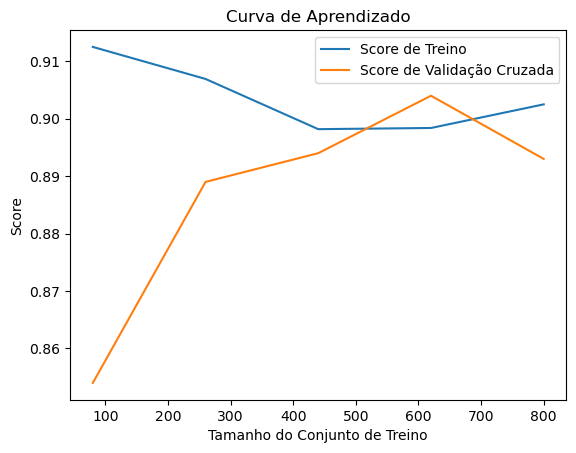

In [37]:
# Curvas de Aprendizado
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(classificador, x, y, cv=5)
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label='Score de Treino')
plt.plot(train_sizes, test_scores_mean, label='Score de Validação Cruzada')
plt.title('Curva de Aprendizado')
plt.xlabel('Tamanho do Conjunto de Treino')
plt.ylabel('Score')
plt.legend()


In [38]:
# Importância de Atributos
# Após ajustar o classificador ao seu conjunto de treino
importancias = classificador.feature_importances_
plt.barh(range(len(importancias)), importancias)
plt.yticks(range(len(x.columns)), x.columns)
plt.xlabel('Importância')
plt.title('Importância dos Atributos')


AttributeError: 'GaussianNB' object has no attribute 'feature_importances_'

In [ ]:
# Otimização de Hiperparâmetros
from sklearn.model_selection import GridSearchCV

parametros = {'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(classificador, parametros, cv=5)
grid_search.fit(x, y)

print(f"Melhores parâmetros: {grid_search.best_params_}")
print(f"Melhor score: {grid_search.best_score_}")


In [ ]:
# Curvas ROC e AUC
n_classes = 2

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier

# Para um problema multiclasse, binarize as saídas
y_binarized = label_binarize(y, classes=[*range(n_classes)])  # n_classes = número de classes

# Dividindo os dados
x_train, x_teste, y_treino, y_teste = train_test_split(x, y_binarized, test_size=0.5)

# Ajuste do classificador em uma estratégia OneVsRest
ovr_classificador = OneVsRestClassifier(classificador)
ovr_classificador.fit(x_train, y_treino)

# Calcular a curva ROC e a área sob a curva (AUC)
fpr, tpr, _ = roc_curve(y_teste.ravel(), ovr_classificador.predict_proba(x_teste)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc="lower right")


In [ ]:
# Logging
import logging

logging.basicConfig(filename='modelo.log', level=logging.INFO)

logging.info('Inicio do treinamento do modelo')
# Adicione logs em pontos importantes do seu código, como após o treinamento do modelo, durante a avaliação, etc.


In [ ]:
# Pipeline de Processamento
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classificador', DecisionTreeClassifier(random_state=5))
])

pipeline.fit(x_treino, y_treino)
pipeline_score = pipeline.score(x_teste, y_teste)
print(f"Score do pipeline: {pipeline_score}")


## **K-Nearest Neighbors (KNN)**

O K-Nearest Neighbors (KNN) é um algoritmo de aprendizado baseado em instância, ou seja, ele memoriza os exemplos de treinamento e não aprende explicitamente um modelo. Em vez disso, ele faz previsões para novos dados calculando a similaridade (geralmente a distância euclidiana) entre as entradas e selecionando os rótulos mais comuns (para classificação) ou a média dos vizinhos mais próximos (para regressão).

### **Princípios Chave**

- **Não Paramétrico**: Não faz suposições sobre a forma da função que mapeia entradas para saídas.
- **Lazy Learning**: O algoritmo não constrói um modelo interno, mas simplesmente armazena os dados de treinamento.

### **Hiperparâmetros Principais**

- **`n_neighbors`**: O número de vizinhos a considerar. Determina o "k" em KNN. Um valor muito baixo faz o modelo sensível ao ruído dos dados; um valor muito alto torna o classificador indiferente às características locais dos dados.

- **`weights`**: Função de peso utilizada na predição. Opções comuns incluem `uniform` (todos os pontos têm o mesmo peso) e `distance` (pesos inversamente proporcionais à distância ao ponto de consulta).

- **`metric`**: A métrica de distância para medir a proximidade entre os pontos. A distância euclidiana é a mais comum, mas outras métricas como a distância de Manhattan também podem ser usadas.

### **Vantagens**

- **Simplicidade**: Fácil de entender e implementar.
- **Eficiência em Conjuntos de Dados Pequenos**: Funciona bem com conjuntos de dados pequenos e não requer treinamento.

### **Desvantagens**

- **Escalabilidade**: Torna-se significativamente lento à medida que o tamanho do conjunto de dados aumenta.
- **Alto Custo Computacional**: Cada consulta requer uma comparação com cada amostra no conjunto de treinamento.
- **Sensibilidade a Dados Não Normalizados**: Distâncias podem ser distorcidas se os atributos não estiverem na mesma escala.

### **Aplicações**

- **Classificação e Regressão**: O KNN pode ser usado tanto para tarefas de classificação quanto de regressão em diversos domínios, como reconhecimento de padrões, recomendação de sistemas e busca por semelhança de imagens.

### **Considerações Finais**

Apesar de sua simplicidade, o KNN pode ser extremamente eficaz para certos problemas de classificação e regressão, especialmente em domínios onde a relação entre as características dos dados e as variáveis de saída é intuitivamente compreensível em termos de proximidade ou semelhança.


In [ ]:
knn = KNeighborsClassifier()
knn.fit()
knn.fit(x_treino_normalizado, y_treino)
x_teste_normalizado = normalizacao.transform(x_teste)
knn.score(x_teste_normalizado, y_teste)
